In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_blobs

In [3]:
x,y=make_blobs(n_samples=1000, n_features=2, centers=5, random_state=3)

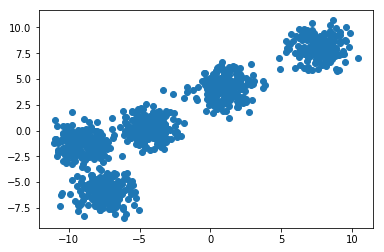

In [4]:
plt.scatter(x[:,0],x[:,1])
plt.show()

In [5]:
k=5
colors=['green','blue','red','yellow','grey']
clusters={}
for each_cluster in range(k):
    # step 1 initailise cluster centre randomly
    center=10*(2*np.random.random((x.shape[1],))-1)
    points=[]
    cluster={
        'center':center,
        'points':points,
        'color':colors[each_cluster]
    }
    clusters[each_cluster]=cluster

In [6]:
clusters

{0: {'center': array([-5.98791204,  0.61358977]),
  'points': [],
  'color': 'green'},
 1: {'center': array([9.14224606, 1.00254895]), 'points': [], 'color': 'blue'},
 2: {'center': array([9.91400184, 4.79938968]), 'points': [], 'color': 'red'},
 3: {'center': array([-4.3351385 ,  3.10900426]),
  'points': [],
  'color': 'yellow'},
 4: {'center': array([-2.8764776 , -4.53724922]),
  'points': [],
  'color': 'grey'}}

In [7]:
#step2 to find distance and assigning points to the cluster

In [8]:
def distance(v1,v2):
    return np.sqrt(np.sum((v1-v2)**2))

In [9]:
#assigning every data point to one of the cluster
def assignPointsToClusters(clusters):
    for every_data_point in range(x.shape[0]):
        dist=[]
        current_x=x[every_data_point]
        for kx in range(k):
            d=distance(current_x,clusters[kx]['center'])
            dist.append(d)
        current_cluster=np.argmin(dist)
        clusters[current_cluster]['points'].append(x[every_data_point])

In [10]:
#m step maximizing step
#step 3 update your cluster centre by taking means
def updateClusters(clusters):
    for kx in range(k):
        pts=np.array(clusters[kx]['points'])
        if pts.shape[0]>0:
            # find mean
            new_u=pts.mean(axis=0)
            clusters[kx]['center']=new_u
            clusters[kx]['points']=[]

In [11]:
def plotClusters(clusters):
    for kx in range(k):
        pts=np.array(clusters[kx]['points'])
        if pts.shape[0]>0:
            plt.scatter(pts[:,0],pts[:,1], color=clusters[kx]['color'])
        plt.scatter(clusters[kx]['center'][0],clusters[kx]['center'][1],color='black',marker='*')

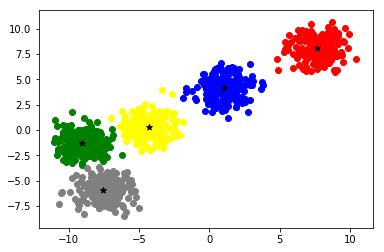

In [44]:
assignPointsToClusters(clusters)
plotClusters(clusters)
updateClusters(clusters)